# Credit EDA & Credit Score Calculation with Python

### Introduction

In today’s financial landscape, understanding customer creditworthiness is paramount for both lenders and consumers. This project aims to conduct a thorough exploratory data analysis (EDA) of a comprehensive dataset that encompasses essential customer details and extensive credit-related information. By delving into variables such as annual income, outstanding debt, and payment behavior, the analysis seeks to uncover meaningful patterns and insights that inform credit risk assessments.

The primary objective is to create new, informative features and develop a hypothetical credit score model inspired by established methodologies, such as FICO scores. Through this deep analysis, we aim to identify factors influencing creditworthiness, provide individualized credit scores for each customer, and explore potential risk mitigation strategies. This project not only enhances our understanding of customer credit profiles but also serves as a valuable tool for financial institutions in making informed lending decisions.

## Exploratory Data Analysis

Importing the required libraries

In [1223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [1224]:
df = pd.read_csv('Credit_score.csv')

In [1225]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


In [1226]:
df.shape

(100000, 27)

In [1227]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [1228]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [1229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1230]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [1231]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          3635
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio     99998
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98790
dtype: int64

In [1232]:
df.sample(1).T

,3938
ID,0x2d14
Customer_ID,CUS_0x122c
Month,March
Name,Papadimasf
Age,47
SSN,883-73-9594
Occupation,Entrepreneur
Annual_Income,36346.13_
Monthly_Inhand_Salary,3188.844167
Num_Bank_Accounts,8


Dropping unnecessary columns as ID and SSN are not involved in the credit score calculation

In [1233]:
df.drop(columns=['ID','SSN'],inplace=True)

------

## Handling Mismatched Data Types

Let's convert the data types for better analysis and performance

In [1234]:
categorical_columns = ['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation','Type_of_Loan',]

for i in categorical_columns:
    df[i] = df[i].astype('category')

In [1235]:
floating_columns = ['Annual_Income','Monthly_Inhand_Salary','Num_of_Loan','Num_of_Delayed_Payment','Interest_Rate',
                    'Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly',
                    'Monthly_Balance']

# Since there are few characters in these floating columns which is restricting us to change its data type. 
# So let's replace it and change its data type

for i in floating_columns:
        df[i] = df[i].astype('str').str.replace('_','').replace('',pd.NA).dropna().astype('float')

In [1236]:
df['Age'] = df['Age'].str.replace(r'[_\s-]', '', regex=True)
df['Age']=df['Age'].astype('int')

In [1237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Customer_ID               100000 non-null  object  
 1   Month                     100000 non-null  category
 2   Name                      90015 non-null   object  
 3   Age                       100000 non-null  int32   
 4   Occupation                100000 non-null  category
 5   Annual_Income             100000 non-null  float64 
 6   Monthly_Inhand_Salary     84998 non-null   float64 
 7   Num_Bank_Accounts         100000 non-null  int64   
 8   Num_Credit_Card           100000 non-null  int64   
 9   Interest_Rate             100000 non-null  float64 
 10  Num_of_Loan               100000 non-null  float64 
 11  Type_of_Loan              88592 non-null   category
 12  Delay_from_due_date       100000 non-null  int64   
 13  Num_of_Delayed_Payment    9299

# Handling missing values and inconsistent data

In [1238]:
df.isnull().sum()

Customer_ID                     0
Month                           0
Name                         9985
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
dtype: int64

In [1239]:
df[df['Name'].isna()].head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
7,CUS_0xd40,August,NaN,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168
17,CUS_0x2dbc,February,NaN,34,Engineer,143162.64,12187.220000,1,5,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",13,6.0,7.10,3.0,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992320,232.860384,High_spent_Small_value_payments,998.869297
22,CUS_0x2dbc,July,NaN,34,Engineer,143162.64,12187.220000,1,5,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",8,6.0,7.10,3.0,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992320,263.174163,High_spent_Small_value_payments,968.555517
64,CUS_0x4157,January,NaN,23,Doctor,114838.41,9843.867500,2,5,7.0,-100.0,"Personal Loan, Debt Consolidation Loan, and Au...",13,11.0,8.24,3.0,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.193516,High_spent_Small_value_payments,802.300442
80,CUS_0xa66b,January,NaN,40,Teacher,33751.27,2948.605833,5,5,20.0,3.0,"Credit-Builder Loan, Personal Loan, and Auto Loan",16,20.0,11.00,4.0,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.306697,High_spent_Medium_value_payments,362.545712


In [1240]:
missing_names = df[df['Name'].isna()]['Customer_ID'].unique()
missing_names

array(['CUS_0xd40', 'CUS_0x2dbc', 'CUS_0x4157', ..., 'CUS_0x372c',
       'CUS_0xf16', 'CUS_0x8600'], dtype=object)

In [1241]:
match_names = df[df['Customer_ID'].isin(missing_names)]['Name'].unique()
match_names

array(['Aaron Maashoh', nan, 'Langep', ..., 'Xolai', 'Sabina Zawadzkig',
       'Sarah McBridec'], dtype=object)

We can clearly identify records for customer names by matching them with their customer IDs, allowing us to replace the missing ones. This pattern might apply to other missing records as well. Therefore, we can align all of them based on the most frequent value for each customer.

In [1242]:
missing_values_col = ['Name','Monthly_Inhand_Salary']

for i in missing_values_col:
    df[i]= df.groupby('Customer_ID')[i].transform(lambda x: x.mode()[0])

#### Handling Inconsistent data

In [1243]:
inconsistent_data_col = ['Age','Annual_Income','Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Num_Credit_Inquiries','Num_of_Delayed_Payment','Outstanding_Debt','Total_EMI_per_month']

In [1244]:
df[inconsistent_data_col].value_counts()

Age   Annual_Income  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  Num_Credit_Inquiries  Num_of_Delayed_Payment  Outstanding_Debt  Total_EMI_per_month
14    3.921588e+04   5                  6                13.0           6.0          5.0                   18.0                    1903.55           159.122144             8
22    1.928073e+04   5                  9                32.0           2.0          10.0                  11.0                    2412.06           17.677036              8
39    1.073736e+04   8                  4                14.0           4.0          8.0                   16.0                    1126.18           19.502581              8
22    1.173429e+05   6                  6                17.0           1.0          6.0                   19.0                    764.82            74.134685              8
23    2.222215e+04   7                  6                20.0           4.0          8.0                   9.0                     81.6

We can see the columns Age, Num of bank accounts, Num of credit cards, Interest rate has many inconsistent data. We can treat them by detecting the outliers and rectifying it

#### Handling Outliers

In [1245]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,119.509700,1.764157e+05,4197.328114,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,684.757313,1.429618e+06,3186.918569,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945750e+04,1626.719792,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,34.000000,3.757861e+04,3092.270000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925681,3.367192e+02
75%,42.000000,7.279092e+04,5958.695625,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633330,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [1246]:
df.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [1247]:
float_columns = ['Age','Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance']

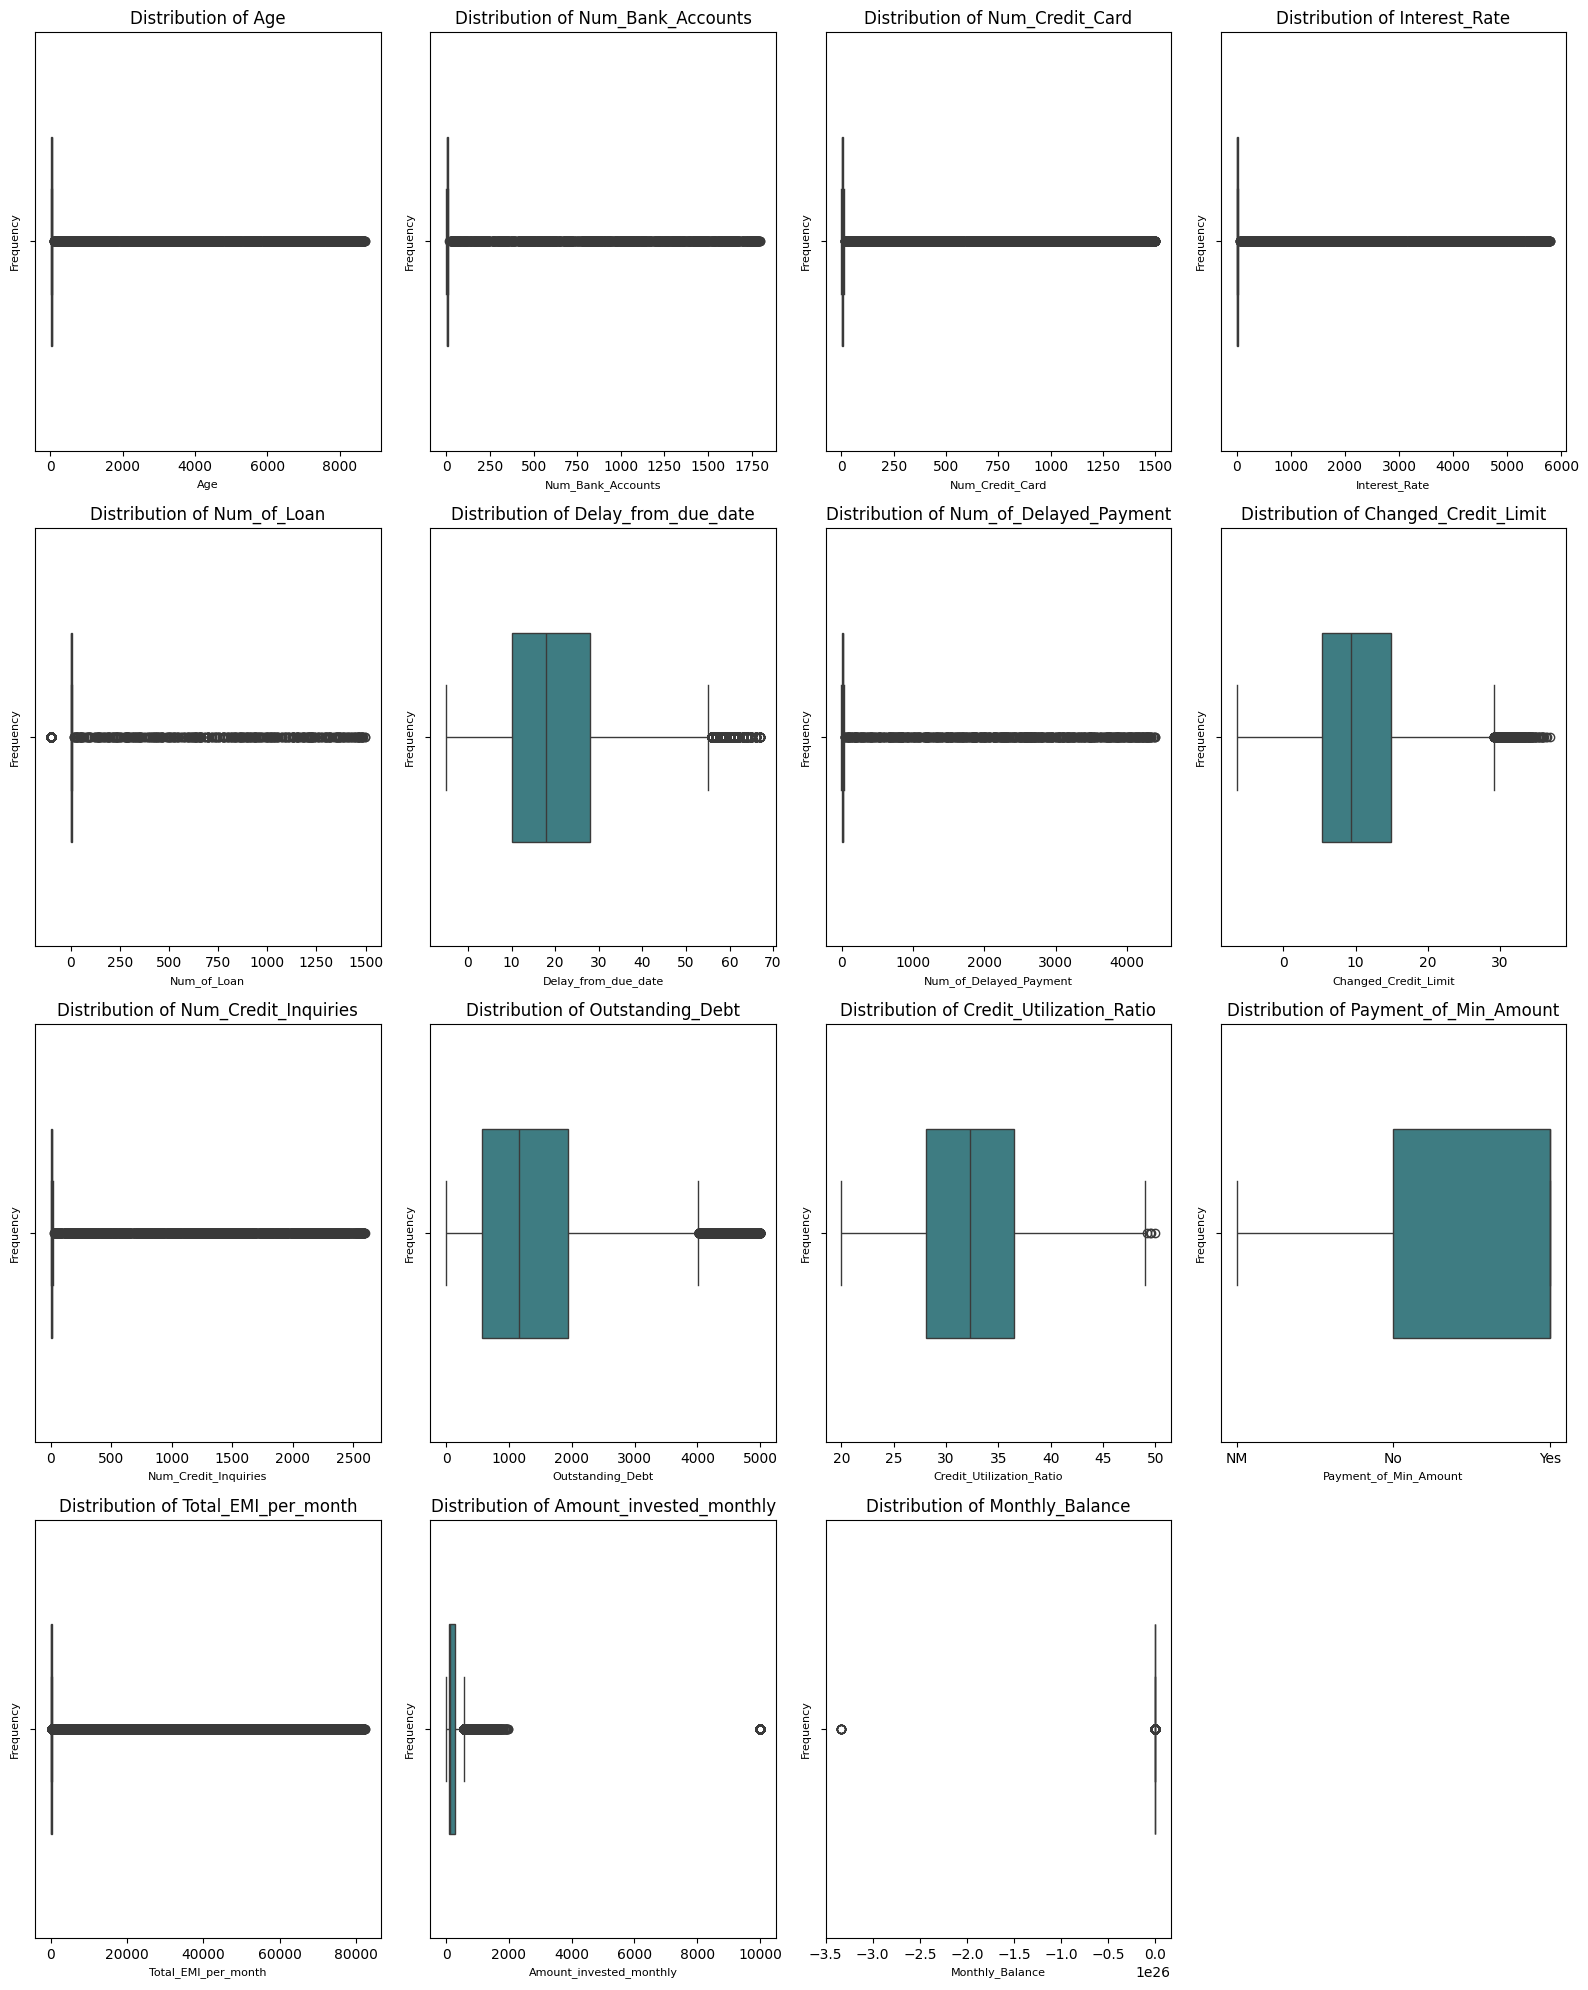

In [1248]:
plt.figure(figsize = (16,20))
for i in range(1,16):
    plt.subplot(4,4,i)
    sns.boxplot(data=df,x=float_columns[i-1],palette='crest',width=0.5)
    plt.title(f'Distribution of {float_columns[i-1]}')
    plt.ylabel('Frequency',fontsize=8)
    plt.xlabel(f'{float_columns[i-1]}',fontsize = 8)
    
plt.tight_layout()
plt.show()

We can clearly visualize that there are numerous outliers across different columns

In [1249]:
for i in inconsistent_data_col:
    df[i]= df.groupby('Customer_ID')[i].transform(lambda x: x.mode()[0])

In [1250]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: 1 if x==-1 else x)

In [1251]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: np.nan if x<0 else x)
df['Delay_from_due_date'] = df['Delay_from_due_date'].ffill()

In [1252]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: np.nan if x<0 else x)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].ffill()

In [1253]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].apply(lambda x: np.nan if x<0 else x)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].ffill()

In [1254]:
inconsistent_data_col_mean = ['Amount_invested_monthly','Monthly_Balance']

for i in inconsistent_data_col_mean:
    df[i]= df.groupby('Customer_ID')[i].transform(lambda x: x.mean())

In [1255]:
df[inconsistent_data_col_mean].describe()

,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05
mean,637.569686,-3.000000e+22
std,751.516474,1.117637e+24
min,15.292436,-4.166667e+25
25%,117.185215,2.844555e+02
50%,233.589940,3.383843e+02
75%,1336.541021,4.652797e+02
max,5748.505316,1.349265e+03


In [1256]:
df[inconsistent_data_col].describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_Credit_Inquiries,Num_of_Delayed_Payment,Outstanding_Debt,Total_EMI_per_month
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,50505.123449,5.368160,5.532720,14.53208,3.532880,5.677760,13.279520,1426.220376,105.543371
std,10.764438,38299.422093,2.591996,2.067504,8.74133,2.446356,3.827248,6.186425,1155.129026,125.810030
min,14.000000,7005.930000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.230000,0.000000
25%,24.000000,19342.972500,3.000000,4.000000,7.00000,2.000000,3.000000,9.000000,566.072500,29.049047
50%,33.000000,36999.705000,5.000000,5.000000,13.00000,3.000000,5.000000,14.000000,1166.155000,66.033915
75%,42.000000,71683.470000,7.000000,7.000000,20.00000,5.000000,8.000000,18.000000,1945.962500,145.582332
max,56.000000,179987.280000,10.000000,11.000000,34.00000,9.000000,17.000000,28.000000,4998.070000,1779.103254


In [1257]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [1258]:
df['Credit_Mix'] = df['Credit_Mix'].apply(lambda x: np.nan if x=='_' else x)
df['Credit_Mix']= df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.mode()[0])

In [1259]:
df['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [1260]:
df['Occupation'] = df['Occupation'].apply(lambda x: np.nan if x=='_______' else x)
df['Occupation']= df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode()[0])

In [1261]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [1262]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: 'No' if x=='NM' else x)

In [1263]:
df[['Payment_Behaviour']].value_counts()

Payment_Behaviour               
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [1264]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: np.nan if x=='!@9#%8' else x)
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.mode()[0])

In [1265]:
df[categorical_columns].describe()

,Month,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Occupation,Type_of_Loan
count,100000,100000,100000,100000,100000,88592
unique,8,3,2,6,15,6260
top,April,Standard,Yes,Low_spent_Small_value_payments,Lawyer,Not Specified
freq,12500,45848,52326,30880,7096,1408


Let's try to visualize various distribution across the dataframe

In [1266]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column_name, bins=30, kde=True, color='#3E7C82', edgecolor='black')
    plt.title(f'Distribution of {column_name}', fontproperties = {'size':11})
    plt.xlabel(column_name, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    sns.despine()
    plt.show()

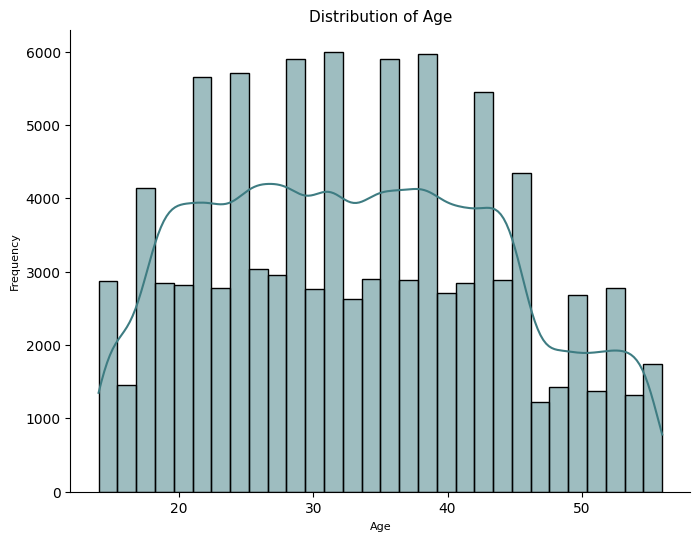

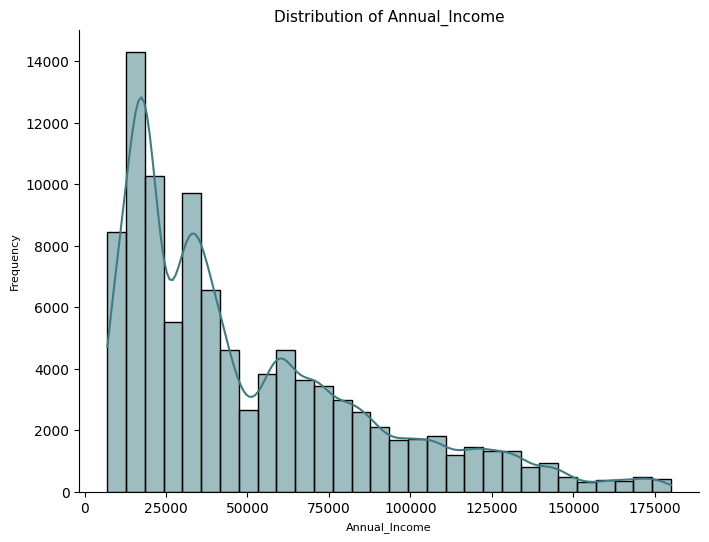

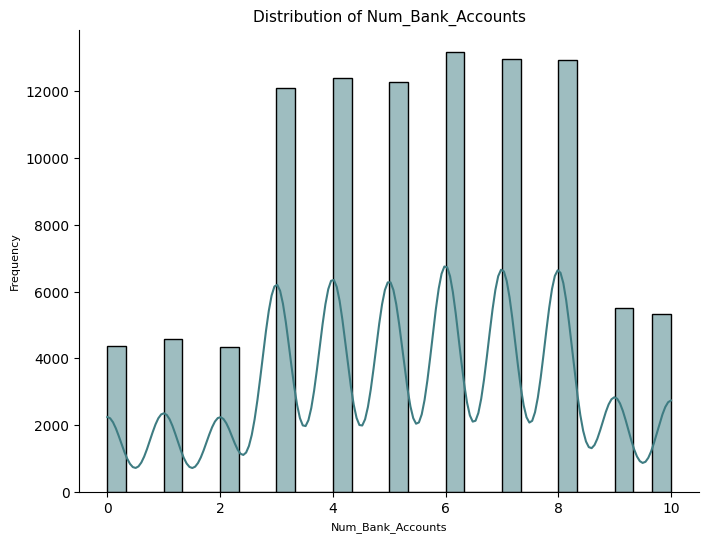

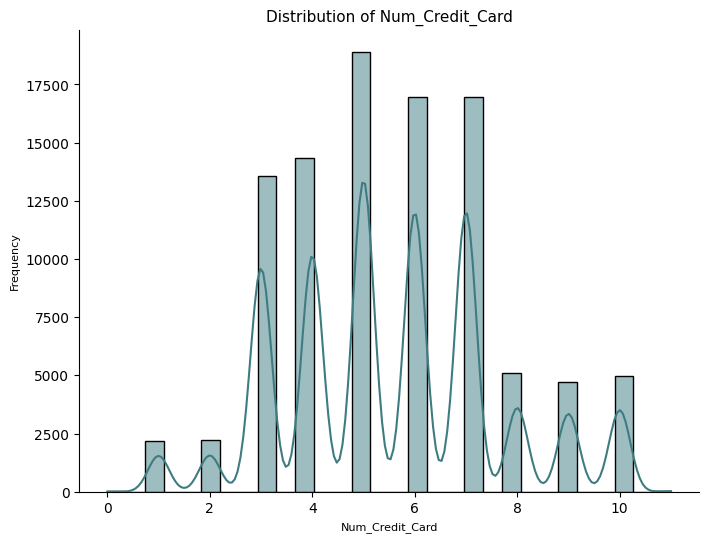

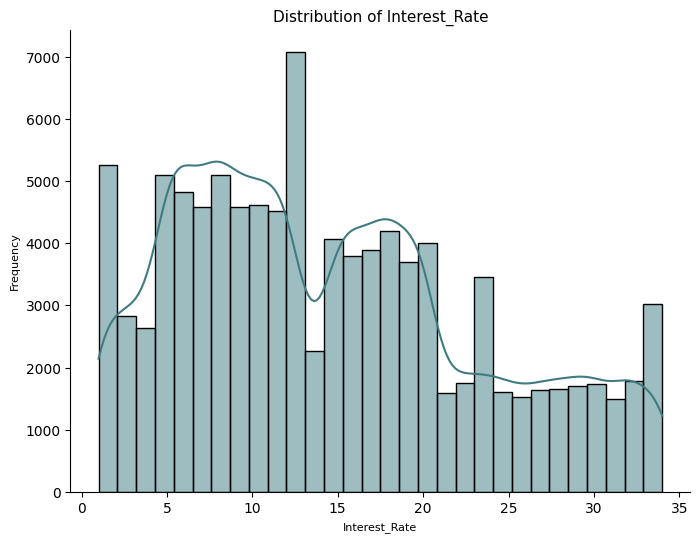

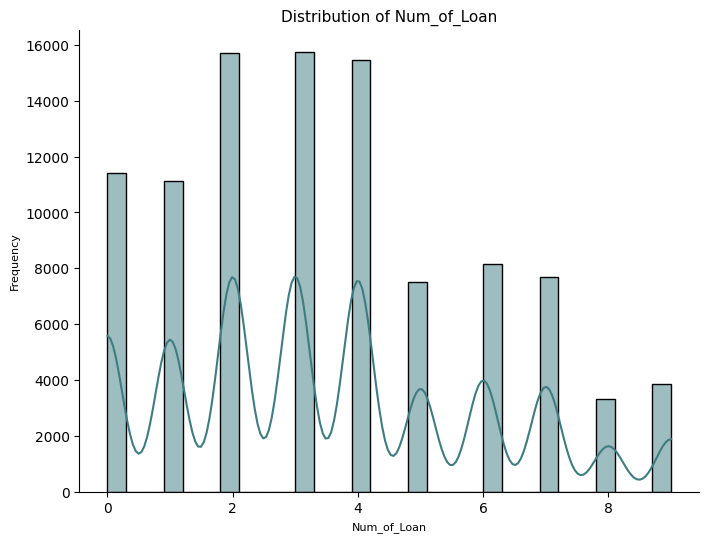

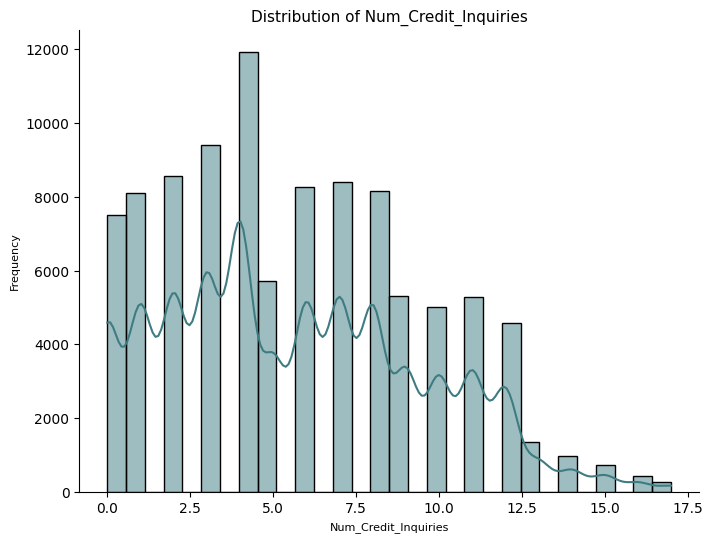

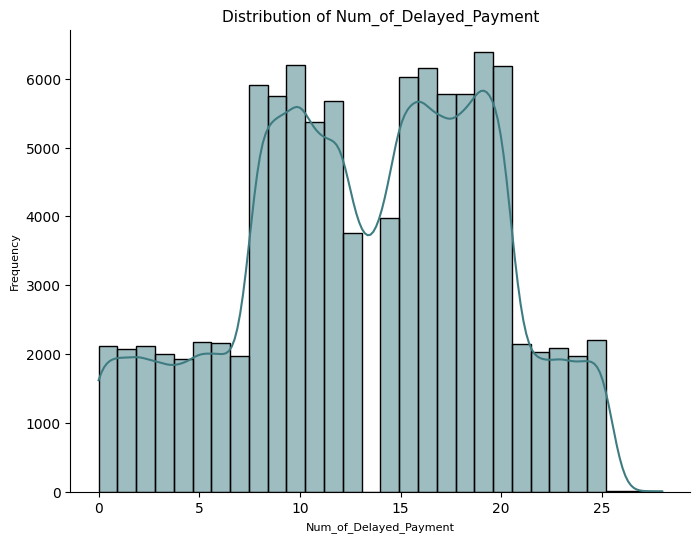

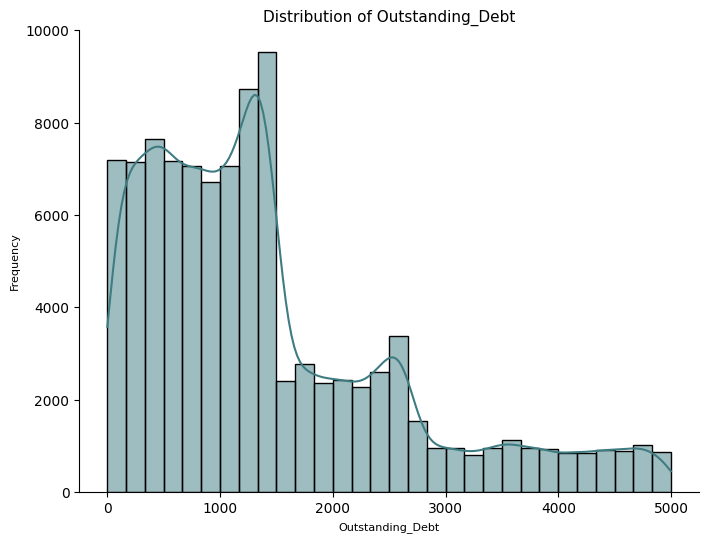

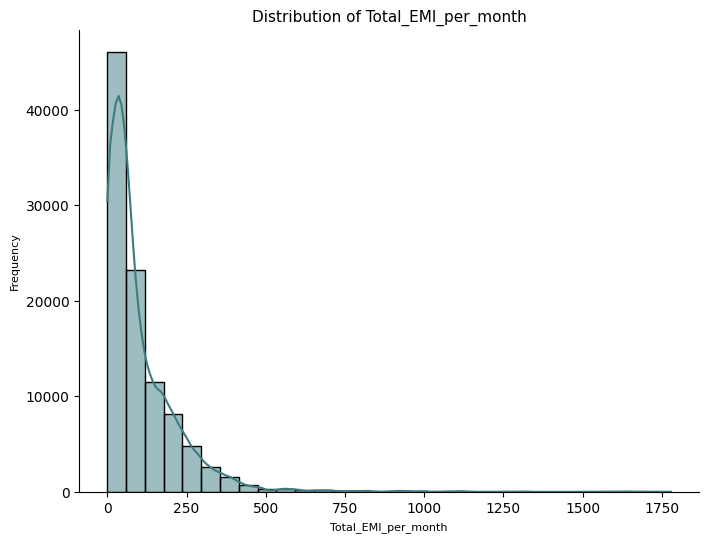

In [1267]:
for x in range(0,len(inconsistent_data_col)): 
    plot_distribution(df,inconsistent_data_col[x])

-----

# Feature Engineering

In [1268]:
df.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294
2,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294


In [1269]:
credit_mix_mapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
payment_behaviour_mapping = {
    'Low_spent_Small_value_payments' : 0,
    'Low_spent_Medium_value_payments' : 1,
    'Low_spent_Large_value_payments' : 2,
    'High_spent_Small_value_payments' : 3,
    'High_spent_Medium_value_payments' : 4,
    'High_spent_Large_value_payments' : 5
    }
df['Credit_Mix_Score'] = df['Credit_Mix'].map(credit_mix_mapping)
df['Payment_Behaviour_Score'] = df['Payment_Behaviour'].map(payment_behaviour_mapping)

In [1270]:
def adjust_credit_history(x):
    if pd.notnull(x):
        year = int(x.split(' ')[0])
        month = int(x.split(' ')[3])
        return (year*12) + month 
    return x


# Group by Customer_ID and apply the forward fill and adjustment function
df['Credit_History_Age'] = df.groupby('Customer_ID', group_keys=False)['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill())
df['Credit_History_Age_Months'] = df.Credit_History_Age.apply(lambda x: adjust_credit_history(x))


In [1271]:
df['Credit_History_Age_Months'].describe()

count    100000.00000
mean        221.27786
std          99.67973
min           1.00000
25%         145.00000
50%         220.00000
75%         302.00000
max         404.00000
Name: Credit_History_Age_Months, dtype: float64

In [1272]:
def credit_history_score(x):
    if pd.notnull(x):
       if x<12:
        return 0
       elif 12<=x<36:
        return 1
       elif 36<=x<84:
        return 2
       elif 84<=x<180:
        return 3
       elif x>180:
        return 4
    return x

df['Credit_History_Score'] = df.Credit_History_Age_Months.apply(lambda x: credit_history_score(x))

In [1273]:
df['Credit_Utilization_Ratio'].describe()

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

In [1274]:
def credit_utlization_score(x):
    if pd.notnull(x):
        if x < 30:
            return 2
        elif 30<=x <50:
            return 1
        else:
            return 0
        
df['Credit_Utilization_Score'] = df.Credit_Utilization_Ratio.apply(lambda x: credit_utlization_score(x))

In [1275]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [1276]:
def outstanding_debt_score(x):
    if pd.notnull(x):
        if x == 0:
            return 5
        elif 1 <= x < 1000:
            return 4
        elif 1000 <= x < 2000:
            return 3
        elif 2000 <= x < 3000:
            return 2
        elif 3000 <= x < 4000:
            return 1
        else:
            return 0
        
df['Outstanding_Debt_Score'] = df.Outstanding_Debt.apply(lambda x: outstanding_debt_score(x))

In [1277]:
df['Num_Credit_Inquiries'].describe()

count    100000.000000
mean          5.677760
std           3.827248
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

In [1278]:
def segment_credit_inquiries(x):
    if pd.notnull(x):
        if x == 0:
            return 5
        elif 1 <= x <= 2:
            return 4
        elif 3 <= x <= 4:
            return 3
        elif 5 <= x <= 6:
            return 2
        elif 7 <= x <= 9:
            return 1
        else:
            return 0
        
df['Credit_Inquiries_Score'] = df.Num_Credit_Inquiries.apply(lambda x: segment_credit_inquiries(x))

In [1279]:
def min_payment_score(x):
    if pd.notnull(x):
        if x == 'Yes':
            return 1
        else:
            return 0
        
df['Payment_of_Min_Amount_Score'] = df.Payment_of_Min_Amount.apply(lambda x: min_payment_score(x))

In [1280]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         13.279520
std           6.186425
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          28.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [1281]:
def segment_delayed_payments(x):
    if pd.notnull(x):
        if x == 0:
            return 5
        elif 1 <= x <= 5:
            return 4
        elif 6 <= x <= 10:
            return 3
        elif 11 <= x <= 15:
            return 2
        elif 16 <= x <= 20:
            return 1
        else:
            return 0
        
df['Delayed_Payment_Score'] = df.Num_of_Delayed_Payment.apply(lambda x: segment_delayed_payments(x))

In [1282]:
df.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Mix_Score,Payment_Behaviour_Score,Credit_History_Age_Months,Credit_History_Score,Credit_Utilization_Score,Outstanding_Debt_Score,Credit_Inquiries_Score,Payment_of_Min_Amount_Score,Delayed_Payment_Score
0,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,2,4,265,4,2,4,3,0,4
1,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,22 Years and 3 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,2,4,267,4,1,4,3,0,4
2,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,2,4,267,4,2,4,3,0,4
3,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,2,4,268,4,1,4,3,0,4
4,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,98.35409,High_spent_Medium_value_payments,304.555294,2,4,269,4,2,4,3,0,4


------

## Hypothetical Credit Score Calculation

In [1283]:
credit_score_df = df.iloc[:, -9:]

In [1284]:
credit_score_df.head()

,Credit_Mix_Score,Payment_Behaviour_Score,Credit_History_Age_Months,Credit_History_Score,Credit_Utilization_Score,Outstanding_Debt_Score,Credit_Inquiries_Score,Payment_of_Min_Amount_Score,Delayed_Payment_Score
0,2,4,265,4,2,4,3,0,4
1,2,4,267,4,1,4,3,0,4
2,2,4,267,4,2,4,3,0,4
3,2,4,268,4,1,4,3,0,4
4,2,4,269,4,2,4,3,0,4


In [1285]:
df_normalized = (credit_score_df - credit_score_df.min()) / (credit_score_df.max() - credit_score_df.min())

In [1286]:
df_normalized.head()

,Credit_Mix_Score,Payment_Behaviour_Score,Credit_History_Age_Months,Credit_History_Score,Credit_Utilization_Score,Outstanding_Debt_Score,Credit_Inquiries_Score,Payment_of_Min_Amount_Score,Delayed_Payment_Score
0,1.0,0.8,0.655087,0.022222,1.0,1.0,0.6,0.0,0.8
1,1.0,0.8,0.660050,0.022222,0.5,1.0,0.6,0.0,0.8
2,1.0,0.8,0.660050,0.022222,1.0,1.0,0.6,0.0,0.8
3,1.0,0.8,0.662531,0.022222,0.5,1.0,0.6,0.0,0.8
4,1.0,0.8,0.665012,0.022222,1.0,1.0,0.6,0.0,0.8


In [1287]:
def calculate_credit_score(row):
    score = (
        (0.20 * (row['Credit_Utilization_Score'])) +    
        (0.15 * (row['Credit_History_Score'])) +        
        (0.1 * (row['Payment_of_Min_Amount_Score'])) +
        (0.1 * (row['Delayed_Payment_Score'])) +
        (0.1 * (row['Credit_Inquiries_Score'])) +
        (0.1 * (row['Outstanding_Debt_Score'])) +
        (0.15 * (row['Credit_Mix_Score'])) +       
        (0.1 * (row['Payment_Behaviour_Score']))        
    )
    return score*100

In [1288]:
df_normalized['Credit_Score'] = df_normalized.apply(calculate_credit_score, axis=1)

In [1289]:
df_normalized.head()

,Credit_Mix_Score,Payment_Behaviour_Score,Credit_History_Age_Months,Credit_History_Score,Credit_Utilization_Score,Outstanding_Debt_Score,Credit_Inquiries_Score,Payment_of_Min_Amount_Score,Delayed_Payment_Score,Credit_Score
0,1.0,0.8,0.655087,0.022222,1.0,1.0,0.6,0.0,0.8,67.333333
1,1.0,0.8,0.660050,0.022222,0.5,1.0,0.6,0.0,0.8,57.333333
2,1.0,0.8,0.660050,0.022222,1.0,1.0,0.6,0.0,0.8,67.333333
3,1.0,0.8,0.662531,0.022222,0.5,1.0,0.6,0.0,0.8,57.333333
4,1.0,0.8,0.665012,0.022222,1.0,1.0,0.6,0.0,0.8,67.333333


In [1290]:
df_normalized['Credit_Score'].describe()

count    100000.000000
mean         48.090813
std          11.675146
min          10.000000
25%          39.833333
50%          49.333333
75%          57.166667
max          80.000000
Name: Credit_Score, dtype: float64

In [1291]:
def scale_value(old_value, old_min=0, old_max=100, new_min=300, new_max=900):
    scaled_value = new_min + ((old_value - old_min) * (new_max - new_min)) / (old_max - old_min)
    return scaled_value

old_values = df_normalized['Credit_Score']
scaled_values = [scale_value(val) for val in old_values]

df_normalized['Scaled_Credit_Score'] = scaled_values

In [1292]:
df_normalized['Scaled_Credit_Score'].describe()

count    100000.000000
mean        588.544880
std          70.050879
min         360.000000
25%         539.000000
50%         596.000000
75%         643.000000
max         780.000000
Name: Scaled_Credit_Score, dtype: float64

Customers in our dataframe have a credit score range that varies from 360 - 780.

In [1293]:
df['Credit_Score'] = df_normalized['Scaled_Credit_Score']

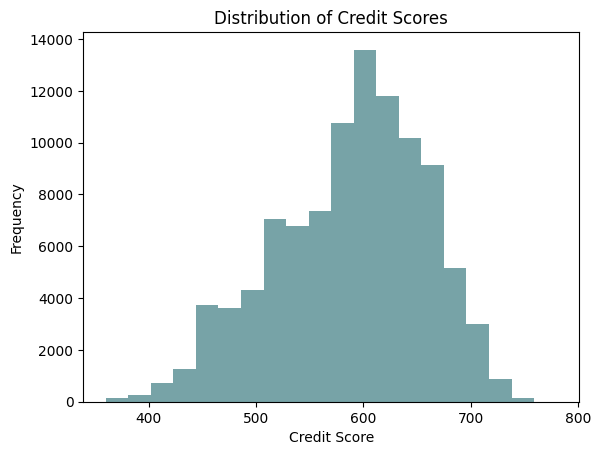

In [1294]:
plt.hist(df['Credit_Score'], bins=20, color='#3E7C82', alpha=0.7)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

In [1295]:
def segment_credit_score(x):
    if pd.notnull(x):
        if x < 300:
            return 'No History'
        elif 300 <= x < 550:
            return 'Poor'
        elif 550 <= x <= 650:
            return 'Fair'
        elif 650 <= x <= 750:
            return 'Good'
        else:
            return 'Excellant'
        
df['Credit_Score_Segment'] = df.Credit_Score.apply(lambda x: segment_credit_score(x))

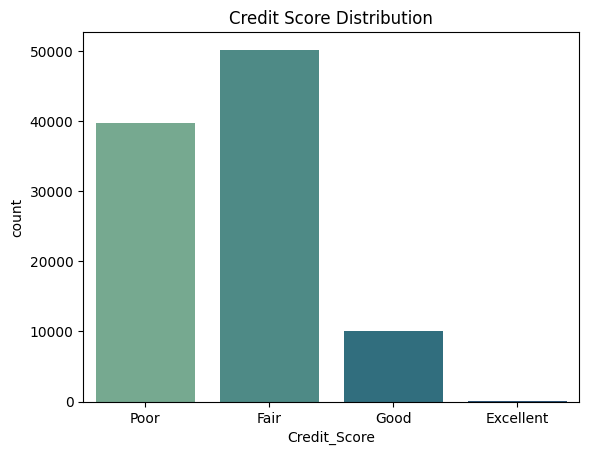

In [1296]:
score_ranges = pd.cut(df['Credit_Score'], bins=[300, 580, 670, 740, 850], labels=['Poor','Fair', 'Good', 'Excellent'])
score_distribution = score_ranges.value_counts()

sns.barplot(data=score_distribution,palette='crest')
plt.title('Credit Score Distribution')
plt.show()

### Methodology for Credit Score Calculation
The credit score is a crucial metric used to assess an individual's creditworthiness and potential risk to lenders. In this project, we developed a scoring model that incorporates multiple factors to calculate a hypothetical credit score, with the final scores scaled to a range between 300 and 900.

#### Scoring Components
The scoring model is based on a weighted sum of various individual scores derived from different aspects of the customer’s credit profile. Each component reflects a distinct facet of credit behavior, ensuring a comprehensive evaluation. The components and their respective weights are as follows:

- Credit Utilization Score (20%): This score assesses the ratio of credit used to the total credit limit. Lower utilization indicates responsible credit management, contributing positively to the credit score.

- Credit History Score (15%): This score reflects the length and reliability of an individual's credit history. A longer, positive credit history enhances the score, signaling stability and reliability to lenders.

- Payment of Minimum Amount Score (10%): This score evaluates whether customers consistently pay only the minimum required amount on their credit accounts. Paying more than the minimum is indicative of good credit behavior and is rewarded in the scoring system.

- Delayed Payment Score (10%): This score accounts for the frequency and severity of delayed payments. A lower score is assigned for frequent delays, negatively impacting the overall creditworthiness.

- Credit Inquiries Score (10%): This score considers the number of credit inquiries made by the individual. Excessive inquiries may indicate financial distress, thereby reducing the score.

- Outstanding Debt Score (10%): This score assesses the total outstanding debt of the customer. Higher levels of debt can be a red flag, leading to a lower score.

- Credit Mix Score (15%): This score evaluates the diversity of credit types (e.g., credit cards, loans) held by the individual. A varied credit mix generally indicates a more robust credit profile.

- Payment Behavior Score (10%): This score looks at the overall payment behavior, including consistency and timeliness in fulfilling payment obligations.

- Calculation Process
The individual scores are multiplied by their respective weights, reflecting their significance in determining creditworthiness. The weighted scores are then summed to produce a composite score:

$$
Credit Score
=
(
0.20
×
Credit Utilization Score
)
+
(
0.15
×
Credit History Score
)
+
(
0.10
×
Payment of Minimum Amount Score
)
+
(
0.10
×
Delayed Payment Score
)
+
(
0.10
×
Credit Inquiries Score
)
+
(
0.10
×
Outstanding Debt Score
)
+
(
0.15
×
Credit Mix Score
)
+
(
0.10
×
Payment Behavior Score
)
$$

#### Scaling the Score
Once the raw credit score is calculated, it is scaled to fit within a standardized range of 300 to 900. This is done to align the scores with industry standards and provide a more intuitive understanding of credit risk. The scaling ensures that the final score reflects a credible measure of creditworthiness, with higher scores indicating better credit profiles.

#### Conclusion
This scoring methodology combines various dimensions of credit behavior into a single metric that aids in risk assessment. By utilizing a systematic and weighted approach, we can derive a comprehensive credit score that provides valuable insights into an individual's creditworthiness, enabling financial institutions to make informed lending decisions.

In [1297]:
df.corr(numeric_only=True)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Score,Payment_Behaviour_Score,Credit_History_Age_Months,Credit_History_Score,Credit_Utilization_Score,Outstanding_Debt_Score,Credit_Inquiries_Score,Payment_of_Min_Amount_Score,Delayed_Payment_Score,Credit_Score
Age,1.000000,0.091785,0.090753,-0.190795,-0.148665,-0.217841,-0.213684,-0.174081,-0.187294,-0.155976,-0.256668,-0.202274,0.025508,-0.054230,0.016119,-0.004857,0.243187,0.046142,0.234331,0.013780,-0.017354,0.197020,0.260559,-0.230356,0.183817,0.182609
Annual_Income,0.091785,1.000000,0.998158,-0.284090,-0.217863,-0.302352,-0.255560,-0.249631,-0.289451,-0.174765,-0.281242,-0.269319,0.175930,0.451305,0.160620,-0.001906,0.342239,0.519274,0.272360,0.010202,-0.110791,0.257799,0.273542,-0.268284,0.282107,0.377284
Monthly_Inhand_Salary,0.090753,0.998158,1.000000,-0.283052,-0.217006,-0.301753,-0.254316,-0.248931,-0.288343,-0.174614,-0.280505,-0.269037,0.176105,0.436125,0.160523,-0.002445,0.340962,0.520796,0.271441,0.009924,-0.110920,0.257482,0.272701,-0.267605,0.281025,0.376897
Num_Bank_Accounts,-0.190795,-0.284090,-0.283052,1.000000,0.442455,0.584453,0.472511,0.558709,0.611130,0.331633,0.522969,0.507073,-0.071849,0.058891,-0.052490,0.014169,-0.723768,-0.156398,-0.485328,-0.030997,0.044882,-0.493236,-0.514419,0.505532,-0.595677,-0.546703
Num_Credit_Card,-0.148665,-0.217863,-0.217006,0.442455,1.000000,0.497921,0.417835,0.478365,0.429535,0.254267,0.463219,0.490266,-0.055353,0.065674,-0.034087,0.004031,-0.544726,-0.117691,-0.416936,-0.028476,0.033388,-0.473300,-0.442103,0.359790,-0.421586,-0.454546
Interest_Rate,-0.217841,-0.302352,-0.301753,0.584453,0.497921,1.000000,0.559156,0.588170,0.579867,0.368115,0.638544,0.629414,-0.075700,0.081963,-0.050328,0.010505,-0.753124,-0.169884,-0.576226,-0.031393,0.045880,-0.608014,-0.621022,0.546340,-0.571101,-0.598634
Num_of_Loan,-0.213684,-0.255560,-0.254316,0.472511,0.417835,0.559156,1.000000,0.500710,0.481315,0.373078,0.569625,0.638713,-0.100469,0.352741,-0.040486,0.003409,-0.637558,-0.155761,-0.605723,-0.038971,0.058232,-0.619211,-0.562323,0.449029,-0.473087,-0.542263
Delay_from_due_date,-0.174081,-0.249631,-0.248931,0.558709,0.478365,0.588170,0.500710,1.000000,0.549162,0.294949,0.543557,0.571341,-0.063693,0.090384,-0.033215,0.012169,-0.687903,-0.142734,-0.490781,-0.032890,0.035535,-0.551268,-0.524792,0.438140,-0.541193,-0.563090
Num_of_Delayed_Payment,-0.187294,-0.289451,-0.288343,0.611130,0.429535,0.579867,0.481315,0.549162,1.000000,0.332528,0.511773,0.513238,-0.075005,0.061343,-0.067497,0.006034,-0.768841,-0.156607,-0.489842,-0.030185,0.044685,-0.497850,-0.507359,0.521358,-0.973137,-0.640823
Changed_Credit_Limit,-0.155976,-0.174765,-0.174614,0.331633,0.254267,0.368115,0.373078,0.294949,0.332528,1.000000,0.386050,0.462539,-0.047618,0.073902,-0.029207,-0.001651,-0.430367,-0.088530,-0.427002,-0.036660,0.029296,-0.449830,-0.392795,0.437547,-0.323657,-0.319631


------

### Distribution of various Features by Credit Score

In [1298]:
df['Age'].describe()

count    100000.000000
mean         33.274560
std          10.764438
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

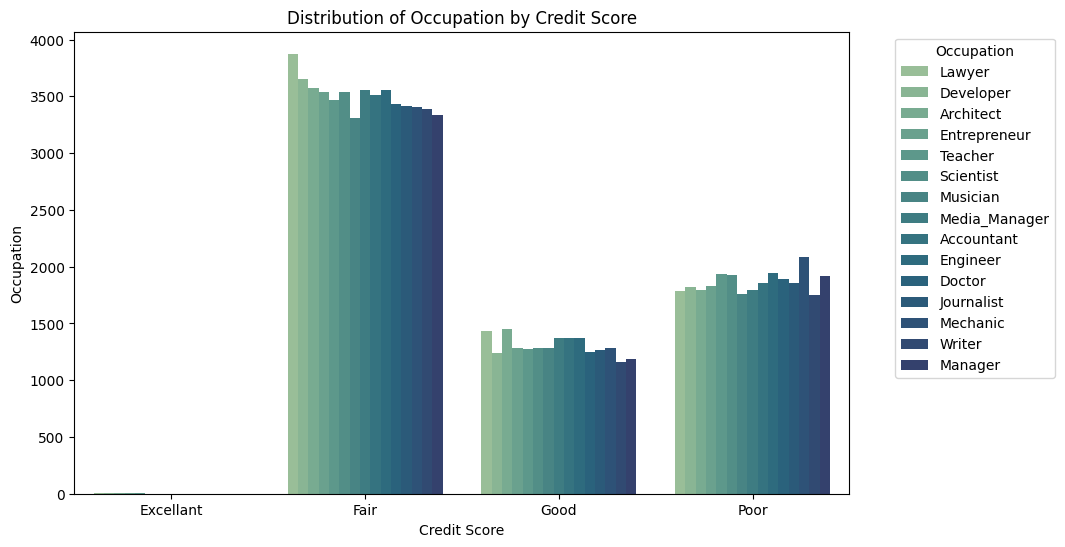

In [1299]:
def column_by_credit_score(col):
    total_by_credit_score = df.groupby('Credit_Score_Segment')[col].value_counts().reset_index(name='Count')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Credit_Score_Segment', y='Count', hue=col, data=total_by_credit_score, palette='crest')
    plt.title(f'Distribution of {col} by Credit Score')
    plt.xlabel('Credit Score')
    plt.ylabel(f'{col}')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

column_by_credit_score('Occupation')

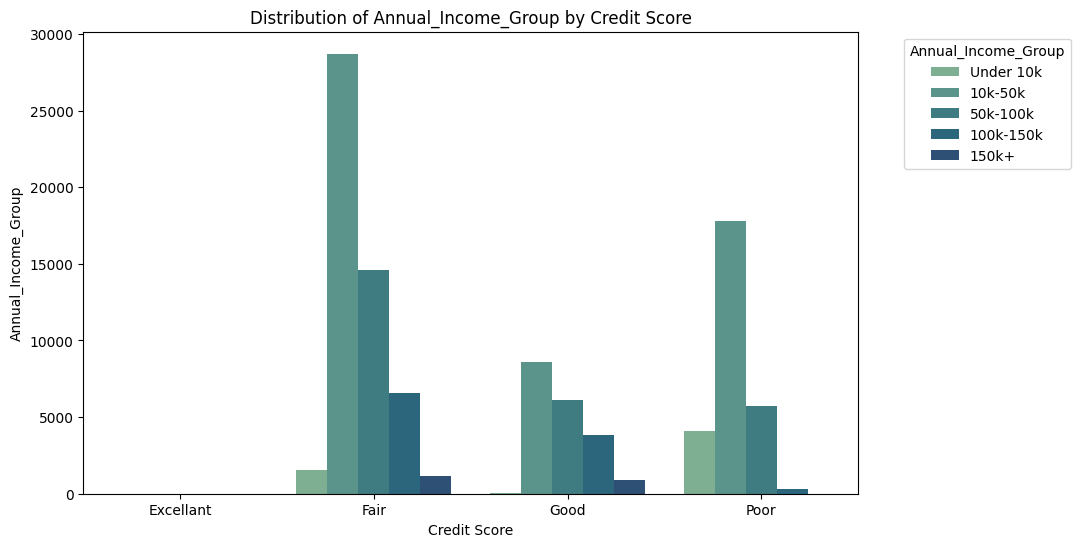

In [1300]:
bins = [0, 10000, 50000, 100000, 150000,200000]
labels = ['Under 10k', '10k-50k', '50k-100k', '100k-150k', '150k+']
df['Annual_Income_Group'] = pd.cut(df['Annual_Income'], bins=bins, labels=labels)
column_by_credit_score('Annual_Income_Group')

From this bar plot showing the total count of credit scores by annual income groups, we can infer the following:

1. **Fair Credit Score and Income**:
   - The majority of individuals with a **Fair** credit score fall into the **$10k-$50k** income group, followed by a significant number in the **$50k-$100k** group. This suggests that people with mid-range incomes are most likely to have a fair credit score.
   - Those with incomes **under $10k** also have a relatively high count in the "Fair" category, indicating that lower-income individuals tend to fall in this credit range as well.

2. **Good Credit Score and Higher Income**:
   - As income increases, the proportion of people with a **Good** credit score also increases, particularly in the **$50k-$100k** and **$100k-$150k** income ranges. This shows a positive correlation between higher income and good credit scores, suggesting that individuals with more financial resources are generally able to maintain better credit.
   - However, the total count of individuals with a "Good" credit score remains smaller compared to those with a fair credit score, even for higher income groups.

3. **Poor Credit Score Across Income Groups**:
   - Interestingly, individuals with a **Poor** credit score are spread across all income groups, with a noticeable concentration in the **$10k-$50k** and **$50k-$100k** ranges. This implies that even middle-income earners can struggle with managing their credit effectively.
   - Lower income groups (under $10k) also have a sizable count in the "Poor" credit category, which is expected as financial challenges at lower income levels often lead to higher credit risk.

4. **Scarcity of Excellent Credit Scores**:
   - There are almost no individuals in the **Excellent** credit score category across all income groups, implying that very few people, regardless of income, achieve this score. It highlights the difficulty of reaching and maintaining excellent credit, which may depend on factors beyond income alone, such as financial habits and history.

5. **Overall Trend**:
   - Higher income groups tend to have better credit scores (Good), while lower and middle-income groups are predominantly represented in the "Fair" and "Poor" categories. This suggests that income is a factor influencing credit score, but not the only determinant, as people from all income levels can still face credit challenges.

In summary, income does play a role in credit scores, with higher incomes generally associated with better scores. However, financial management and other credit-related behaviors likely play an equally important role, as credit challenges are visible across all income levels.

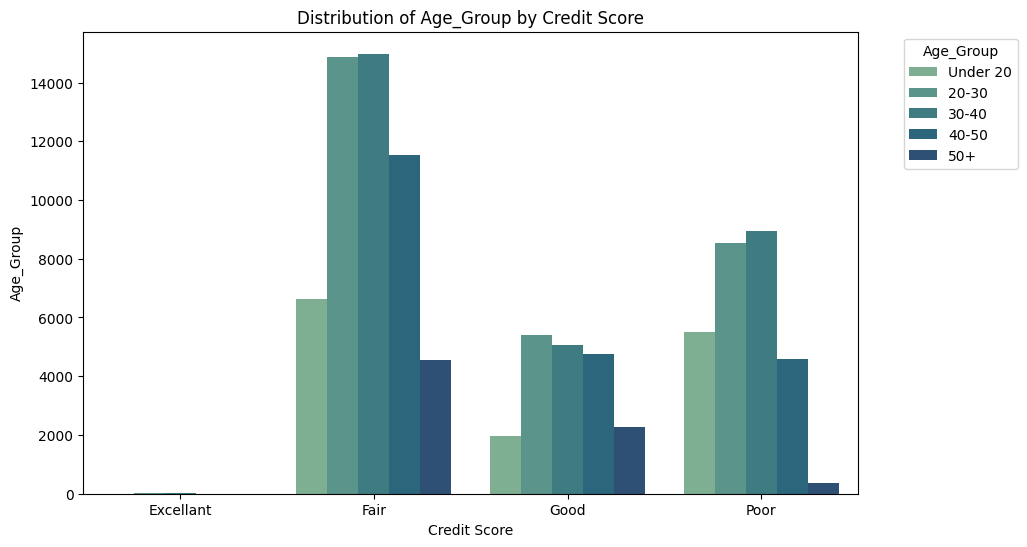

In [1301]:
bins = [0, 20, 30, 40, 50, 56]
labels = ['Under 20', '20-30', '30-40', '40-50', '50+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
column_by_credit_score('Age_Group')

From the bar plot showing the total count by credit score across different age groups, we can infer several insights:

1. **Credit Score Distribution**: Most individuals fall under the "Fair" credit score category across all age groups. Very few people have "Excellent" credit scores, and a notable portion falls into the "Poor" category.

2. **Age Group Patterns**:
   - The **20-30 and 30-40 age groups** have the highest counts in the "Fair" category. This suggests that younger adults tend to have average credit scores, possibly due to shorter credit histories or higher debt utilization.
   - The **40-50 age group** shows a balanced distribution across "Fair," "Good," and "Poor" scores, indicating some financial maturity but also potential risk due to delayed payments or credit issues.
   - Individuals **under 20** and those **over 50** are more likely to have "Poor" credit scores, which could be due to a lack of credit history in younger individuals or financial difficulties among older people.
   
3. **Scarcity of "Excellent" Credit Scores**: There are hardly any individuals with an "Excellent" credit score across all age groups, which could indicate that achieving a high credit score may be difficult or uncommon within the dataset.

4. **Poor Credit Scores**: A significant number of individuals in all age groups have "Poor" credit scores, which is concerning from a financial stability perspective, as these individuals may struggle with higher interest rates or difficulty securing loans.

In summary, most customers have "Fair" credit scores, particularly in the 20-40 age range, while poor credit scores are more frequent for younger and older age groups. This could be a result of factors like financial inexperience, high debt levels, or insufficient credit history.

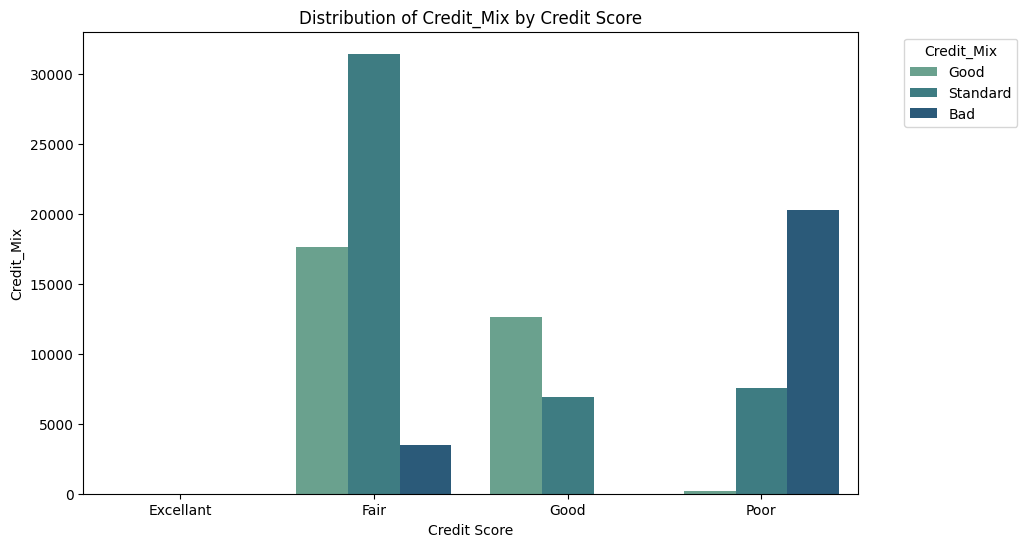

In [1302]:
column_by_credit_score('Credit_Mix')

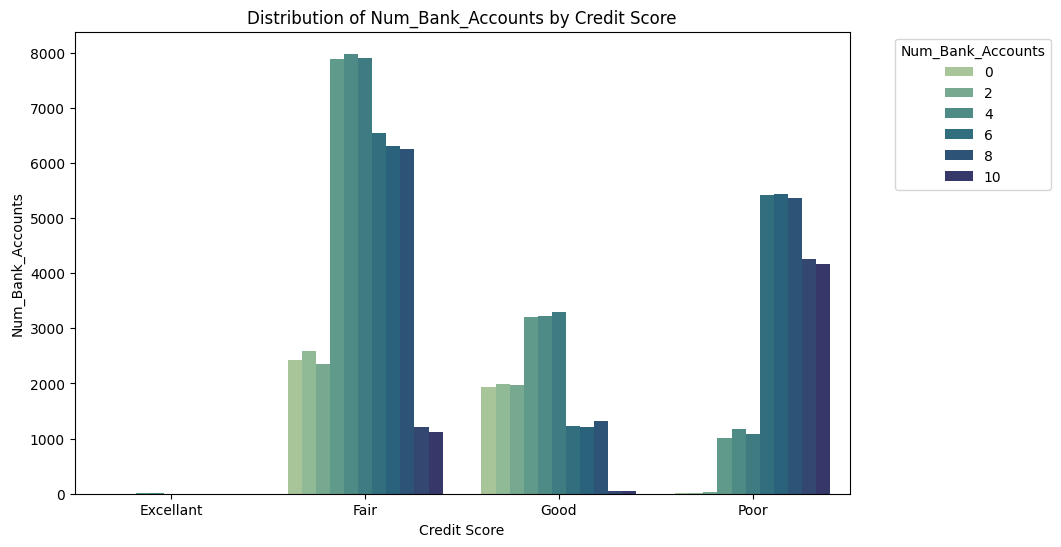

In [1303]:
column_by_credit_score('Num_Bank_Accounts')

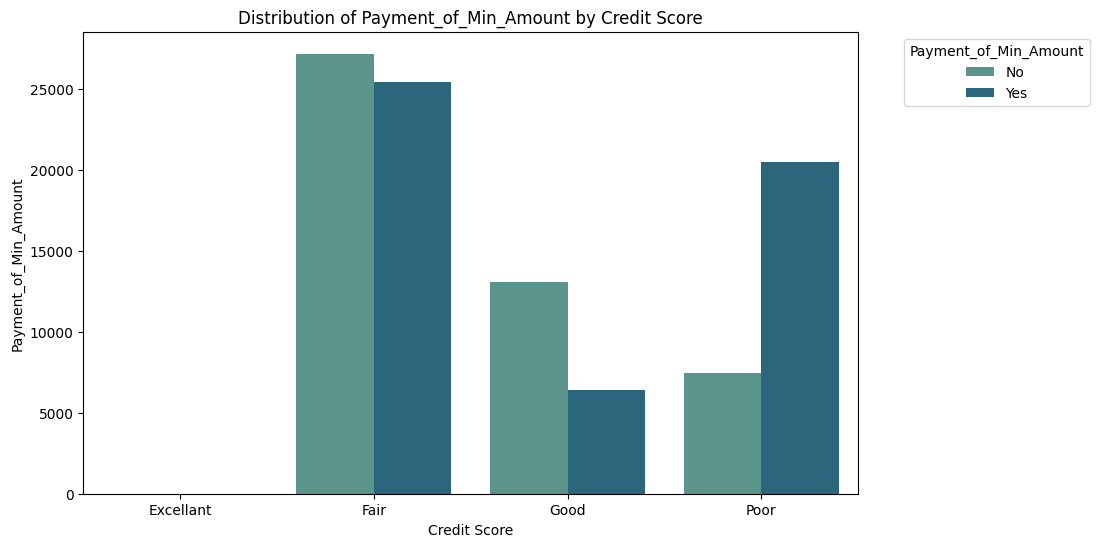

In [1304]:
column_by_credit_score('Payment_of_Min_Amount')

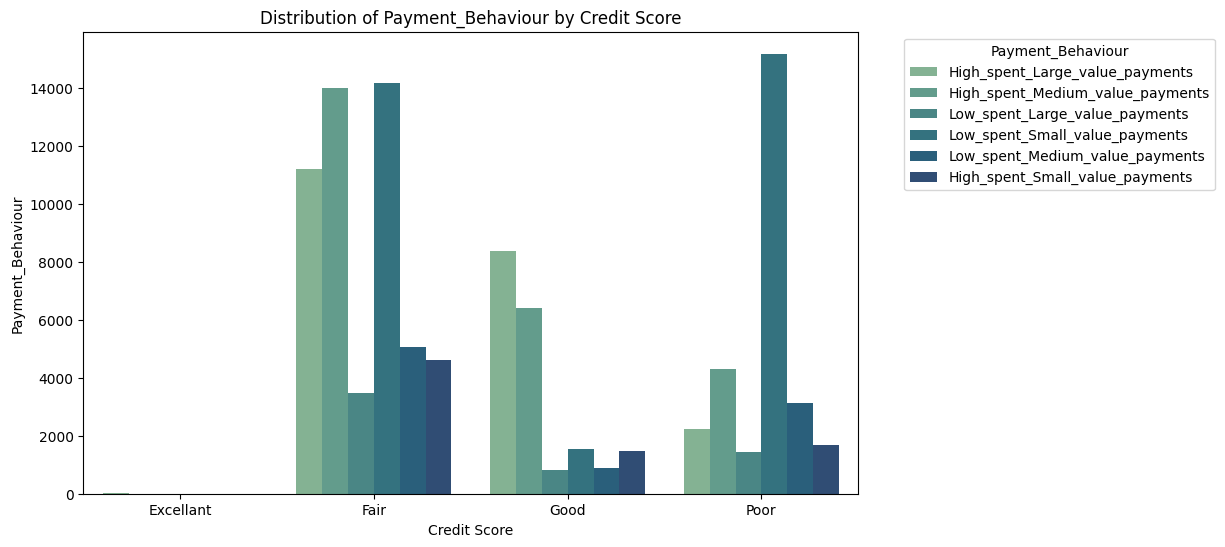

In [1305]:
column_by_credit_score('Payment_Behaviour')

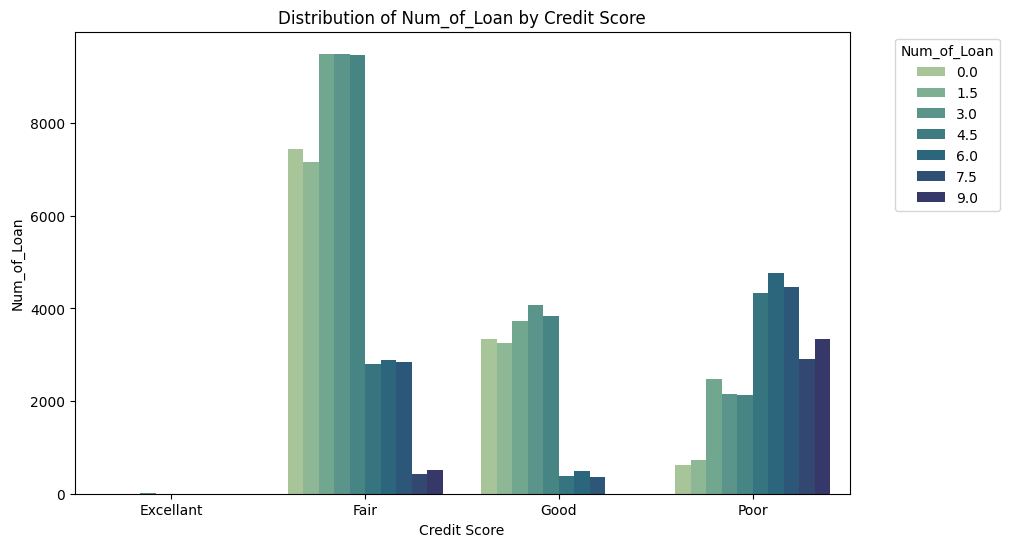

In [1306]:
column_by_credit_score('Num_of_Loan')

From the bar plot showing the number of loans versus the total count of credit scores, we can infer the following:

1. **Credit Score Distribution and Loan Counts**:
   - **Fair Credit Score**: The majority of individuals with a "Fair" credit score have either 0, 1.5, or 3 loans. This suggests that maintaining a moderate number of loans tends to result in an average (fair) credit score for many customers.
   - **Good Credit Score**: Individuals with a "Good" credit score are distributed across 0 to 6 loans, but those with fewer loans (0 or 1.5) have a higher total count in this category. This indicates that fewer loans are generally associated with better credit scores.
   - **Poor Credit Score**: Customers with a "Poor" credit score show a higher count for 4.5 to 9 loans. This suggests that having more loans is correlated with poor credit scores, likely due to the increased financial burden or repayment challenges.

2. **Loan Impact on Credit Score**:
   - As the **number of loans increases**, especially beyond 3 loans, the likelihood of having a "Poor" credit score increases. This highlights the strain that multiple loans can place on an individual's creditworthiness.
   - Conversely, **fewer loans** (especially between 0 and 3) seem to be associated with "Fair" and "Good" credit scores, implying that controlled borrowing has a positive impact on credit health.

3. **Scarcity of Excellent Scores**: Very few individuals across all loan categories have an "Excellent" credit score, reinforcing that maintaining an excellent score requires not just a minimal number of loans but also other favorable financial behaviors.

In summary, the number of loans has a significant relationship with credit scores, where fewer loans are generally associated with better credit scores, while a higher number of loans tends to coincide with poorer scores.

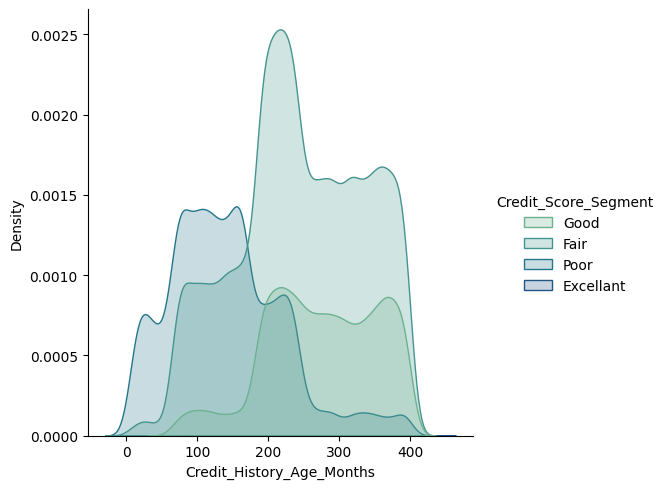

In [1307]:
sns.displot(
    df, 
    x='Credit_History_Age_Months',
    hue='Credit_Score_Segment', 
    kind='kde', 
    fill=True,palette='crest')

plt.show()

--------

### Recency Based Metrics

Let's pick last 3 months data and calculate the metrics

In [1308]:
customer_group = df[(df['Month']=='June') | (df['Month']=='July') | (df['Month']=='August')]
customer_group.head()

,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Mix_Score,Payment_Behaviour_Score,Credit_History_Age_Months,Credit_History_Score,Credit_Utilization_Score,Outstanding_Debt_Score,Credit_Inquiries_Score,Payment_of_Min_Amount_Score,Delayed_Payment_Score,Credit_Score,Credit_Score_Segment,Annual_Income_Group,Age_Group
5,CUS_0xd40,June,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,98.354090,High_spent_Medium_value_payments,304.555294,2,4,270,4,2,4,3,0,4,704.0,Good,10k-50k,20-30
6,CUS_0xd40,July,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,98.354090,High_spent_Medium_value_payments,304.555294,2,4,271,4,2,4,3,0,4,704.0,Good,10k-50k,20-30
7,CUS_0xd40,August,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,23.933795,22 Years and 7 Months,No,49.574949,98.354090,High_spent_Medium_value_payments,304.555294,2,4,271,4,2,4,3,0,4,704.0,Good,10k-50k,20-30
13,CUS_0x21b1,June,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,4,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,95.637999,High_spent_Large_value_payments,454.344453,2,5,324,4,1,4,4,0,4,668.0,Good,10k-50k,20-30
14,CUS_0x21b1,July,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,4,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,31.131702,27 Years and 1 Months,No,18.816215,95.637999,High_spent_Large_value_payments,454.344453,2,5,325,4,1,4,4,0,4,668.0,Good,10k-50k,20-30


In [1309]:
average_credit_score = customer_group.groupby('Customer_ID',group_keys=False).agg({'Credit_Score':'mean'})
average_credit_score.sort_values(by='Credit_Score',ascending=False)

,Credit_Score
Customer_ID,
CUS_0x3ec1,743.0
CUS_0x9da4,740.0
CUS_0x6a79,732.0
CUS_0x7a59,731.0
CUS_0x5205,728.0
...,...
CUS_0x2c15,401.5
CUS_0x992b,401.5
CUS_0x1c89,401.5


These are the top 5 and last 5 customers with average credit score

In [1310]:
average_delayed_payments = customer_group.groupby('Customer_ID',group_keys=False).agg({'Delayed_Payment_Score':'sum'})
average_delayed_payments.sort_values(by='Delayed_Payment_Score',ascending=False)

,Delayed_Payment_Score
Customer_ID,
CUS_0x7312,15
CUS_0x319c,15
CUS_0x9011,15
CUS_0x8fee,15
CUS_0xb264,15
...,...
CUS_0x46b5,0
CUS_0x81fe,0
CUS_0x81f4,0


### Insights from Delayed Payment Score (Last 3 Months)

1. **High Delayed Payment Scores (15)**:
   - Customers with no delayed payments in the last 3 months show **strong payment discipline** and a **low-risk profile**.
   - These customers are less likely to default and contribute positively to their credit score.

2. **Low Delayed Payment Scores (0)**:
   - Customers with high delayed payments exhibit a **high-risk profile**, indicating consistent missed payments.
   - These customers need to be flagged for **risk mitigation** strategies as their behavior could harm their credit standing.

3. **Segmentation**:
   - Customers can be segmented into risk tiers:
     - **Low Risk**: No delayed payments (scores of 5).
     - **Moderate Risk**: 1-10 delayed payments (scores of 3-4).
     - **High Risk**: 11+ delayed payments (scores of 2 or below).

4. **Actionable Strategies**:
   - **For High Risk**: Implement reminders, credit restructuring, or limit adjustments to mitigate risks.
   - **For Low Risk**: Offer incentives like lower interest rates or pre-approvals for credit line extensions.

This data helps in **recency-based risk management** by focusing on deteriorating customer behaviors, allowing for proactive risk mitigation.

------

### Change in Credit Score over a period

In [1311]:
new_df = df[(df['Month']=='January') | (df['Month']=='August')][['Customer_ID','Month','Credit_Score']]
new_df.head()

,Customer_ID,Month,Credit_Score
0,CUS_0xd40,January,704.0
7,CUS_0xd40,August,704.0
8,CUS_0x21b1,January,728.0
15,CUS_0x21b1,August,668.0
16,CUS_0x2dbc,January,665.0


In [1312]:
def change_in_credit_score(group):
    group = group.sort_values(by='Month')
    return ((group['Credit_Score'].iloc[-1] - group['Credit_Score'].iloc[0])/group['Credit_Score'].iloc[0])*100

In [1313]:
percentage_change = new_df.groupby('Customer_ID').apply(change_in_credit_score).reset_index(name='Percentage_Change')
percentage_change.sort_values(by='Percentage_Change',ascending=False).reset_index(drop=True)

,Customer_ID,Percentage_Change
0,CUS_0x84d1,33.240997
1,CUS_0x4519,33.195021
2,CUS_0x89a9,33.195021
3,CUS_0xa8ab,32.258065
4,CUS_0xc242,32.171582
...,...,...
12495,CUS_0x85cb,-24.922118
12496,CUS_0x55fd,-24.948025
12497,CUS_0xe7a,-25.000000
12498,CUS_0x9a84,-27.470356


### Insights from Percentage Change in Credit Scores

1. **Positive Changes**:
   - Customers with positive percentage changes (e.g., **CUS_0x84d1 at 33.24%**) have improved credit scores.
   - **Inference**: This suggests responsible credit behavior, such as timely payments, indicating lower risk and eligibility for additional credit offerings.

2. **Moderate Improvements**:
   - A number of customers show moderate positive changes (around **32% to 33%**).
   - **Inference**: This may reflect effective credit management practices or successful interventions from financial institutions.

3. **Negative Changes**:
   - Customers with negative changes (e.g., **CUS_0x85cb at -24.92%**) have experienced declines in their credit scores.
   - **Inference**: These customers may face challenges like missed payments and should be flagged for risk mitigation strategies.

4. **Risk Segmentation**:
   - Customers can be categorized into:
     - **High Growth**: Positive changes.
     - **Moderate Change**: Minimal changes around 0%.
     - **High Risk**: Significant negative changes (e.g., below -20%).
   - **Action**: Tailor communication and support based on these segments.

5. **Overall Trends**:
   - Analyzing the distribution of changes can highlight broader trends in customer behavior, indicating overall economic conditions or institutional effectiveness.
   - A notable number of negative changes may signal emerging issues.

6. **Long-Term Monitoring**:
   - Continuous monitoring is essential to identify consistent patterns and potential risks over time.

The analysis reveals distinct customers, with positive changes indicating responsible management and negative changes highlighting the need for intervention. These insights can guide risk management strategies and customer outreach efforts.

-------

## Insights

### 1. **Trends in Credit Scores**
   - **Fluctuations in Credit Scores**: The credit scores show variability over time. Customers with stable payment behavior tend to maintain higher credit scores, whereas late or missed payments lead to score fluctuations.
   - **Consistency Across Months**: For certain customers, the credit score alternates between two segments (e.g., "Good" to "Fair") depending on factors such as delayed payments or utilization scores.

### 2. **Feature Importance**
   The dataset contains multiple features contributing to the credit score:
   - **Delayed Payment Score**: Significant impact on credit score. Customers with higher delayed payment scores tend to have lower credit scores.
   - **Credit Utilization Score**: Another key feature influencing credit score fluctuations. Customers who consistently utilize less credit are more likely to have a good credit score.
   - **Credit History**: A higher number of months in credit history positively correlates with better credit scores, indicating long-term creditworthiness.
   - **Outstanding Debt and Payment Behavior**: Both features reflect the ability to manage existing debt, directly influencing the overall credit score.

### 3. **Risk Mitigation Strategies**
   - **Encouraging Timely Payments**: Implementing automated reminders and incentives for early payments can help reduce the number of delayed payments, leading to better scores.
   - **Credit Utilization Management**: Advising customers to keep their credit utilization below a certain threshold can improve their credit score over time.
   - **Offering Debt Management Tools**: Providing support to customers with high outstanding debt scores could mitigate financial risks and help improve their credit scores.

### 4. **Future Work**
   - **Prediction Models**: Utilize machine learning models to predict future credit score trends based on historical data and individual features like credit history and utilization.
   - **Customer Segmentation**: Further segment customers based on their risk profiles and tailor mitigation strategies accordingly.
   - **Enhanced Visualizations**: Create dashboards to track credit score trends over time, highlight key influencers, and identify customers at risk of falling into lower credit segments.

--------